In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import drive, files
import os


In [ ]:
drive.mount('/content/drive')
dir_path = "/content/drive/MyDrive/VSD/"

Mounted at /content/drive


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/VSD/archive.zip"
extract_path = "/content/drive/MyDrive/VSD"


with zipfile.ZipFile(zip_path, 'r') as zip_ref:

    zip_ref.extractall(extract_path)

In [ ]:
import matplotlib.pyplot as plt

from PIL import Image,UnidentifiedImageError


In [ ]:
def load_img(impath, target_size=(128, 128)):
    imgs = []
    labels = []
    for i in os.listdir(impath):
        class_dir = os.path.join(impath, i)
        if not os.path.isdir(class_dir):
            continue
        for j in os.listdir(class_dir):
            filepath = os.path.join(class_dir, j)
            if os.path.isdir(filepath):
                continue
            try:
                # ✅ Open, convert to RGB, and resize
                img = Image.open(filepath).convert('RGB')
                img = img.resize(target_size)

                imgs.append(np.array(img))
                labels.append(i)
            except UnidentifiedImageError:
                print(f"Error reading {filepath}")
                continue
    # ✅ Stack safely now that all have same size
    return np.array(imgs), labels

In [ ]:
for root,dir,files in os.walk(dir_path):
 for file in files:

   print (os.path.join(root,file))

/content/drive/MyDrive/VSD/archive.zip
/content/drive/MyDrive/VSD/archive/glioma_tumor/gg(1).jpg
/content/drive/MyDrive/VSD/archive/glioma_tumor/gg (10).jpg
/content/drive/MyDrive/VSD/archive/glioma_tumor/gg (100).jpg
/content/drive/MyDrive/VSD/archive/glioma_tumor/gg (101).jpg
/content/drive/MyDrive/VSD/archive/glioma_tumor/gg (102).jpg
/content/drive/MyDrive/VSD/archive/glioma_tumor/gg (103).jpg
/content/drive/MyDrive/VSD/archive/glioma_tumor/gg (104).jpg
/content/drive/MyDrive/VSD/archive/glioma_tumor/gg (105).jpg
/content/drive/MyDrive/VSD/archive/glioma_tumor/gg (106).jpg
/content/drive/MyDrive/VSD/archive/glioma_tumor/gg (107).jpg
/content/drive/MyDrive/VSD/archive/glioma_tumor/gg (108).jpg
/content/drive/MyDrive/VSD/archive/glioma_tumor/gg (109).jpg
/content/drive/MyDrive/VSD/archive/glioma_tumor/gg (11).jpg
/content/drive/MyDrive/VSD/archive/glioma_tumor/gg (110).jpg
/content/drive/MyDrive/VSD/archive/glioma_tumor/gg (111).jpg
/content/drive/MyDrive/VSD/archive/glioma_tumor/gg 

In [ ]:
x, y = load_img("/content/drive/MyDrive/VSD/archive", target_size=(128, 128))
print("✅ Images loaded successfully")
print("Image array shape:", x.shape)
print("Number of labels:", len(y))
print("Classes found:", set(y))

✅ Images loaded successfully
Image array shape: (2870, 128, 128, 3)
Number of labels: 2870
Classes found: {'no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor'}


In [ ]:
unique_categories,category_counts=np.unique(y,return_counts=True)
for i in range(len(unique_categories)):
  print(f"Category '{unique_categories[i]}'occurs {category_counts[i]} times")



Category 'glioma_tumor'occurs 826 times
Category 'meningioma_tumor'occurs 822 times
Category 'no_tumor'occurs 395 times
Category 'pituitary_tumor'occurs 827 times


Text(0.5, 1.0, 'Category counts')

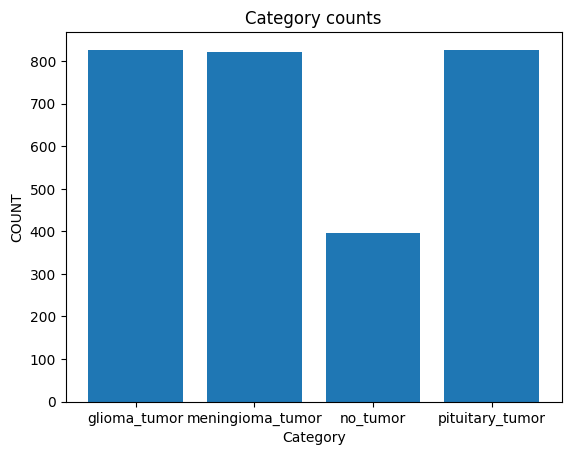

In [ ]:
plt.bar(unique_categories,category_counts)
plt.xlabel("Category")
plt.ylabel("COUNT")

plt.title("Category counts")



In [ ]:
target=pd.Series(y,dtype='category')
print(target)

0          glioma_tumor
1          glioma_tumor
2          glioma_tumor
3          glioma_tumor
4          glioma_tumor
             ...       
2865    pituitary_tumor
2866    pituitary_tumor
2867    pituitary_tumor
2868    pituitary_tumor
2869    pituitary_tumor
Length: 2870, dtype: category
Categories (4, object): ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [ ]:
t=target.cat.codes

print(t)

0       0
1       0
2       0
3       0
4       0
       ..
2865    3
2866    3
2867    3
2868    3
2869    3
Length: 2870, dtype: int8


In [ ]:
unique_category=target.unique()
code_map=dict(zip(unique_categories,t.unique()))
print(code_map)

{np.str_('glioma_tumor'): np.int8(0), np.str_('meningioma_tumor'): np.int8(1), np.str_('no_tumor'): np.int8(2), np.str_('pituitary_tumor'): np.int8(3)}


In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,t,test_size=0.2,shuffle=True)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(2296, 128, 128, 3)
(2296,)
(574, 128, 128, 3)
(574,)


In [ ]:
import numpy as np
#import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

from tensorflow.keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

 Transfer learning

---



In [ ]:
from keras.applications import VGG16

In [ ]:
vgg=VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)

In [ ]:
vgg.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
for i in vgg.layers:
    i.trainable=False
x =Flatten()(vgg.output)

In [ ]:
pred=Dense(5,activation="softmax",)(x)

In [ ]:
model=Model(inputs=vgg.input,outputs=pred)

In [ ]:
model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │       125,445 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,133 (56.61 MB)

 Trainable params: 125,445 (490.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen=ImageDataGenerator(
               rescale=1.0/255,
               width_shift_range=0.2,
               height_shift_range=0.2,
               rotation_range=40,
               shear_range=0.2,
               zoom_range=0.2,
               horizontal_flip=True,
              fill_mode='nearest',
)
train_gen=data_gen.flow(train_x, train_y,batch_size=32)
validation_datagen=ImageDataGenerator(
     rescale=1.0/255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)
validation_gen=validation_datagen.flow(test_x,test_y,batch_size=32)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
Dropout(0.5)
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
Dropout(0.5)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
Dropout(0.8)
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen ,epochs=10 ,validation_data=validation_gen)

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - accuracy: 0.3233 - loss: 1.3499 - val_accuracy: 0.4111 - val_loss: 1.2057
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - accuracy: 0.4558 - loss: 1.1922 - val_accuracy: 0.5244 - val_loss: 1.0921
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 0.5462 - loss: 1.0519 - val_accuracy: 0.6185 - val_loss: 0.9500
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - accuracy: 0.5614 - loss: 1.0122 - val_accuracy: 0.5889 - val_loss: 0.9652
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 166ms/step - accuracy: 0.5824 - loss: 0.9690 - val_accuracy: 0.5732 - val_loss: 0.9598
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/step - accuracy: 0.6100 - loss: 0.8899 - val_accuracy: 0.6150 - val_loss: 0.8702
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 167ms/step - accuracy: 0.6275 - loss: 0.8860 - val_accuracy: 0.6324 - val_loss: 0.8779
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 166ms/step - accuracy: 0.6270 - loss: 0.8666 - val_accu

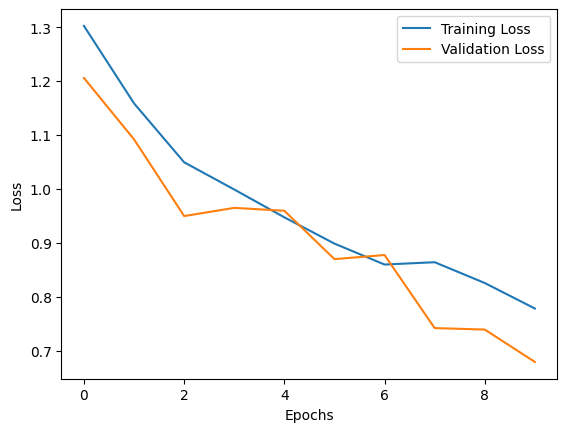

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step


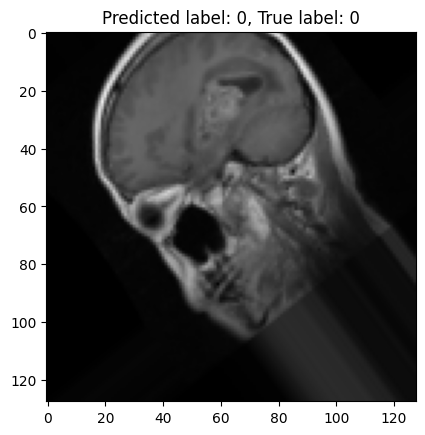

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# get the predicted class probabilities for the validation set
y_pred_prob = model.predict(validation_gen)

# get the predicted class for each sample in the validation set
y_pred = np.argmax(y_pred_prob, axis=1)

# get a batch of validation images and their true labels
x_val, y_val = next(validation_gen)

# select a random image from the batch
index = np.random.randint(len(x_val))

# get the predicted label for the selected image
label_pred = y_pred[index]

# get the true label for the selected image
label_true = y_val[index]

# get the image array for the selected image
img = x_val[index]

# display the image with the predicted and true labels
plt.imshow(img)
plt.title(f"Predicted label: {label_pred}, True label: {label_true}")
plt.show()